%%html

<!-- 
hack to inject CSS in jupyterlab. 

Please RUN this cell before read the document
-->

<style>
    .alert-success {
        background-color: #dff0d8;
        border-color: #d6e9c6;
        color: #3c763d;
    }
    .alert {
        padding: 15px;
        margin-bottom: 18px;
        border: 1px solid transparent;
        border-radius: 2px;
    }
    .alert-info {
        background-color: #d9edf7;
        border-color: #bce8f1;
        color: #31708f;
    }
    .alert-warning {
        background-color: #fcf8e3;
        border-color: #faebcc;
        color: #8a6d3b;
    }
    .badge {
        display: inline-block;
        min-width: 10px;
        padding: 3px 7px;
        font-size: 12px;
        font-weight: bold;
        color: #fff;
        line-height: 1;
        vertical-align: middle;
        white-space: nowrap;
        text-align: center;
        background-color: #777777;
        border-radius: 10px;
    }
</style>

# PGDS Rumos - Programação em Python 
### Trabalho prático de grupo (Parte II)

Data limite de entrega: 21 de Julho de 2019 às 23:59

---

# Parte 1

A primeira parte do trabalho prático de Pandas tem dois objectivos:

* introduzir de uma forma mais prática os conceitos de python e pandas;
* ter contacto com os dados através de uma exploração dos mesmos para melhor se perceber o domínio.

Iremos usar o desafio [2015 Flight Delays and Cancellations](https://www.kaggle.com/usdot/flight-delays) do Kaggle como base para todo o trabalho. Os desafios do Kaggle têm imensos notebooks (kernels) públicos onde os candidatos descrevem as suas abordagens (com código). A sua leitura é aconselhada, contudo, obviamente, evitem copiar partes do código. Em vez disso tentem reimplementar as funções de forma que conhecem / conseguem.

Os dados foram disponibilizados via Slack. Notem que o ficheiro foi alterado para ter dados até Março (incl.). A estrutura dos ficheiros foi mantida, por isso podem considerar estas [definições](https://www.kaggle.com/usdot/flight-delays/data).

A estrutura deste notebook e dos módulos de python já se encontra definida. Apenas terão de:

1. completar funções ou parte de código;
2. implementar a totalidade do código numa **única** célula de forma a responder a uma pergunta.

**Nota**: se vos for mais conveniente poderão alterar a estrutura dos módulos e / ou notebook. Se assim o quiserem, por favor, adicionem comentários esclarecedores relativos a cada parte de forma a eu não cometer erros na avaliação.

<p>
  <div class="alert alert-success">
    Todas as perguntas estarão assinaladas com este fundo verde.
  </div>
</p>

<p>
  <div class="alert alert-info">
    Notem que durante o notebook irão encontrar o comando <a href="https://wiki.python.org/moin/UsingAssertionsEffectively">assert</a> várias vezes. Este comando permite verificar se duas expressões têm o mesmo valor. Irei usá-lo para confirmar que certos valores estão correctos. <span class="badge">Caso algum dê erro, venham falar comigo.</span>
  </div>
</p>

O índice da primeira parte é o seguinte:

**1. Ler datasets** <br>
**2. Obter estatísticas dos dados** <br>
- 2.1 Tipo dos dados
- 2.2 Valores nulos
- 2.3 Estatísticas para cada coluna

**3. Pré-processar os dados** <br>
- 3.1 Trabalhar os campos de datas
- 3.2 Remover campos desnecessarios

**4. Começar data understanding** <br>
**5. Desafios** <br>

___

Vamos começar por carregar todas as dependências que podemos vir a usar. 
Para as que não estiverem instaladas, podem usar o comando 

`!pip install [nome-da-biblioteca]` 

numa célula do Jupyter.

In [1]:
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
# https://plot.ly/python/offline/
import plotly.offline as py

from os import listdir
from os.path import isfile, join
from sklearn import linear_model
from pandas import Series

# inline matplotlib plots
%matplotlib inline
# inline plotly plots
py.init_notebook_mode(connected=True)

# all pandas prints will have this format
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_rows', 200)

# Reload all modules (except those excluded by %aimport) before executing the Python code typed.
# http://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
def read_flights_data(path):
    """
    Reads flights dataset
    
    I'm specifiying different types for each column due to memory consumption
    
    Parameters:
    ----------
    path : string
        flights dataset location
    """
    import pandas as pd
    import csv
    return pd.read_csv(path, 
                     sep=',',
                     quoting=csv.QUOTE_NONE,
                     dtype={'air_system_delay': 'float32',
                            'air_time': 'float32',
                            'airline': 'category',
                            'airline_delay': 'float32',
                            'arrival_delay': 'float32',
                            'arrival_time': 'float32',
                            'cancellation_reason': 'category',
                            'cancelled': 'bool',
                            'day': 'int32',
                            'day_of_week': 'int32',
                            'departure_delay': 'float32',
                            'departure_time': 'float32',
                            'destination_airport': 'object',
                            'distance': 'int32',
                            'diverted': 'bool',
                            'elapsed_time': 'float32',
                            'flight_number': 'int32',
                            'late_aircraft_delay': 'float32',
                            'month': 'int32',
                            'origin_airport': 'object',
                            'scheduled_arrival': 'float32',
                            'scheduled_departure': 'float32',
                            'scheduled_time': 'float32',
                            'security_delay': 'float32',
                            'tail_number': 'object',
                            'taxi_in': 'float32',
                            'taxi_out': 'float32',
                            'weather_delay': 'float32',
                            'wheels_off': 'float32',
                            'wheels_on': 'float32',
                            'year': 'int32'}
    )



In [4]:
plt.rcParams['figure.figsize'] = 12, 8  # default image size


___
### 1. Ler datasets
___

Antes de carregar os dados em memória vamos confirmar que ficheiros existem:

Sendo que os ficheiros são os esperados, podemos proceder com a leitura dos mesmos. 

In [1]:
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
flights = read_flights_data('flights_until_june2.csv') # esta função permite 

# confirm number of rows and columns per dataset
assert airlines.shape == (14, 2)
assert airports.shape == (322, 7)
#assert flights.shape == (2889512, 31)
print('Airlines:', airlines.shape)
print('Airports:', airports.shape)
print('Flights:', flights.shape)

NameError: name 'pd' is not defined

<div class="alert alert-success">
Q.1<br>
  Nas próximas 3 células mostre as primeiras linhas de cada dataset. Sendo que apenas existem 14 companhias aéreas (dataframe <code>airlines</code>), para este mostre todo o dataset, para os restantes mostre as primeiras 10 linhas de cada dataset.
  <br><br>
  Tire algum tempo para analisar os dados que vê, comparar com o que esperava e com a definição dos campos presente no site do Kaggle.
</div>

In [521]:
# Airlines
# Airlines: (14, 2)
# mostrar todas as 14 linhas
airlines

,iata_code,airline
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [754]:
# Airports
# mostrar todas as 10 linhas
airports.head(10)

,iata_code,airport,city,state,country,latitude,longitude
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.652,-75.440
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.411,-99.682
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.040,-106.609
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.449,-98.422
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.536,-84.194
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.253,-70.060
6,ACT,Waco Regional Airport,Waco,TX,USA,31.611,-97.231
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.978,-124.109
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.458,-74.577
9,ADK,Adak Airport,Adak,AK,USA,51.878,-176.646


In [755]:
# Flights
# mostrar todas as 10 linhas
flights.head(10)


,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay,date,is_delayed
0,Qui,AS,98,N407AS,ANC,SEA,5.000,"2,354.000",-11.000,21.000,15.000,205.000,194.000,169.000,1448,404.000,4.000,430.000,408.000,-22.000,False,False,NaN,nan,nan,nan,nan,nan,2015-01-01,False
1,Qui,AA,2336,N3KUAA,LAX,PBI,10.000,2.000,-8.000,12.000,14.000,280.000,279.000,263.000,2330,737.000,4.000,750.000,741.000,-9.000,False,False,NaN,nan,nan,nan,nan,nan,2015-01-01,False
2,Qui,US,840,N171US,SFO,CLT,20.000,18.000,-2.000,16.000,34.000,286.000,293.000,266.000,2296,800.000,11.000,806.000,811.000,5.000,False,False,NaN,nan,nan,nan,nan,nan,2015-01-01,False
3,Qui,AA,258,N3HYAA,LAX,MIA,20.000,15.000,-5.000,15.000,30.000,285.000,281.000,258.000,2342,748.000,8.000,805.000,756.000,-9.000,False,False,NaN,nan,nan,nan,nan,nan,2015-01-01,False
4,Qui,AS,135,N527AS,SEA,ANC,25.000,24.000,-1.000,11.000,35.000,235.000,215.000,199.000,1448,254.000,5.000,320.000,259.000,-21.000,False,False,NaN,nan,nan,nan,nan,nan,2015-01-01,False
5,Qui,DL,806,N3730B,SFO,MSP,25.000,20.000,-5.000,18.000,38.000,217.000,230.000,206.000,1589,604.000,6.000,602.000,610.000,8.000,False,False,NaN,nan,nan,nan,nan,nan,2015-01-01,False
6,Qui,NK,612,N635NK,LAS,MSP,25.000,19.000,-6.000,11.000,30.000,181.000,170.000,154.000,1299,504.000,5.000,526.000,509.000,-17.000,False,False,NaN,nan,nan,nan,nan,nan,2015-01-01,False
7,Qui,US,2013,N584UW,LAX,CLT,30.000,44.000,14.000,13.000,57.000,273.000,249.000,228.000,2125,745.000,8.000,803.000,753.000,-10.000,False,False,NaN,nan,nan,nan,nan,nan,2015-01-01,False
8,Qui,AA,1112,N3LAAA,SFO,DFW,30.000,19.000,-11.000,17.000,36.000,195.000,193.000,173.000,1464,529.000,3.000,545.000,532.000,-13.000,False,False,NaN,nan,nan,nan,nan,nan,2015-01-01,False
9,Qui,DL,1173,N826DN,LAS,ATL,30.000,33.000,3.000,12.000,45.000,221.000,203.000,186.000,1747,651.000,5.000,711.000,656.000,-15.000,False,False,NaN,nan,nan,nan,nan,nan,2015-01-01,False


Na 1ª parte do trabalho prático iremo-nos concentrar apenas no dataset de voos, dataframe `flights`.

___
### 2. Obter estatísticas dos dados 
___

#### 2.1 Tipo dos dados

In [524]:
flights.dtypes

year                      int32
month                     int32
day                       int32
day_of_week               int32
airline                category
flight_number             int32
tail_number              object
origin_airport           object
destination_airport      object
scheduled_departure     float32
departure_time          float32
departure_delay         float32
taxi_out                float32
wheels_off              float32
scheduled_time          float32
elapsed_time            float32
air_time                float32
distance                  int32
wheels_on               float32
taxi_in                 float32
scheduled_arrival       float32
arrival_time            float32
arrival_delay           float32
diverted                   bool
cancelled                  bool
cancellation_reason    category
air_system_delay        float32
security_delay          float32
airline_delay           float32
late_aircraft_delay     float32
weather_delay           float32
dtype: o

Notem que eu defino os tipos de dados deste dataset no momento da leitura (no módulo `utilities`).

#### 2.2 Valores nulos

In [756]:
flights.isnull().sum()

day_of_week                0
airline                    0
flight_number              0
tail_number              167
origin_airport             0
destination_airport        0
scheduled_departure        0
departure_time          2298
departure_delay         2298
taxi_out                2371
wheels_off              2371
scheduled_time             0
elapsed_time            2613
air_time                2613
distance                   0
wheels_on               2440
taxi_in                 2440
scheduled_arrival          0
arrival_time            2440
arrival_delay           2613
diverted                   0
cancelled                  0
cancellation_reason    97610
air_system_delay       65374
security_delay         65374
airline_delay          65374
late_aircraft_delay    65374
weather_delay          65374
date                       0
is_delayed                 0
dtype: int64

<div class="alert alert-success">
Q.2<br>
Aproveite o código da célula anterior e altere-o de forma a obter a percentagem de nulos por coluna. Apresente por ordem descendente.
<br><br>
O top-7 deverá ser:<br>
    
```
cancellation_reason    97.83%
weather_delay          80.13%
airline_delay          80.13%
security_delay         80.13%
air_system_delay       80.13%
late_aircraft_delay    80.13%
arrival_delay           2.46%
```

</div>

In [770]:
# percentage of nulls per column

#para colocar formato de duas casas decimais e simbolo percentagem
#pd.options.display.float_format = '{}'.format

#usar map aos dados para colocar formatação

((flights.isnull().sum() * 100 / len(flights))).sort_values(ascending=False).map('{:.2f}%'.format).head(7)


cancellation_reason    97.61%
weather_delay          65.37%
late_aircraft_delay    65.37%
airline_delay          65.37%
security_delay         65.37%
air_system_delay       65.37%
air_time                2.61%
dtype: object

#### 2.3 Estatísticas para cada coluna

In [527]:
# columns type distribution
flights.dtypes.value_counts()

float32     18
int32        6
object       3
bool         2
category     1
category     1
dtype: int64

De seguida iremos analisar cada coluna individualmente. Para colunas numéricas normalmente verificam-se indicadores como a média, valor mínimo, valor máximo e alguns percentis. Para os restantes tipos (`string`, `boolean` e `category`) pode-se analisar o top-10 valores mais frequentes.
<br><br>
<div class="alert alert-success">
Q.3<br>
Nas próximas células implemente o código necessário para efetuar esta análise.
<br><br>
    Relativamente às variáveis não numéricas implemente a função <code>most_frequent_values</code>.
</div>

In [528]:
# numerical columns
#describe() dá as estatisticas para variaveis numericas, mesmo que a serie tenha mais variaveis
# 24 campos numericos
flights.describe()

#flights
#flights.dtypes

#bool
#diverted 	cancelled
#object
#tail_number 	origin_airport 	destination_airport 
#category
# 	airline 	cancellation_reason



,year,month,day,day_of_week,flight_number,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
count,"99,999.000","99,999.000","99,999.000","99,999.000","99,999.000","99,999.000","97,701.000","97,701.000","97,628.000","97,628.000","99,999.000","97,386.000","97,386.000","99,999.000","97,559.000","97,559.000","99,999.000","97,559.000","97,386.000","34,625.000","34,625.000","34,625.000","34,625.000","34,625.000"
mean,"2,015.000",1.000,3.734,4.107,"2,240.850","1,306.350","1,326.268",19.938,17.156,"1,348.428",143.040,142.364,117.099,830.395,"1,454.531",8.118,"1,481.118","1,458.033",18.343,14.027,0.071,17.854,26.015,2.752
std,0.000,0.000,1.816,2.098,"1,818.709",482.328,503.511,45.844,10.738,504.145,76.235,76.650,74.307,609.183,532.928,7.561,498.918,538.214,48.878,25.965,1.693,43.528,42.593,17.266
min,"2,015.000",1.000,1.000,1.000,1.000,5.000,1.000,-39.000,1.000,1.000,23.000,17.000,8.000,31.000,1.000,1.000,1.000,1.000,-65.000,0.000,0.000,0.000,0.000,0.000
25%,"2,015.000",1.000,2.000,2.000,759.000,904.000,911.000,-3.000,11.000,928.000,86.000,85.000,62.000,377.000,"1,046.000",4.000,"1,100.000","1,050.000",-8.000,0.000,0.000,0.000,0.000,0.000
50%,"2,015.000",1.000,4.000,4.000,"1,693.000","1,300.000","1,317.000",3.000,14.000,"1,330.000",125.000,125.000,98.000,669.000,"1,452.000",6.000,"1,500.000","1,455.000",4.000,4.000,0.000,4.000,10.000,0.000
75%,"2,015.000",1.000,5.000,6.000,"3,394.000","1,720.000","1,739.000",25.000,20.000,"1,753.000",175.000,177.000,150.000,"1,069.000","1,907.000",9.000,"1,908.000","1,911.000",27.000,19.000,0.000,19.000,35.000,0.000
max,"2,015.000",1.000,7.000,7.000,"7,438.000","2,359.000","2,400.000","1,380.000",176.000,"2,400.000",718.000,724.000,676.000,"4,983.000","2,400.000",179.000,"2,359.000","2,400.000","1,384.000",590.000,107.000,"1,380.000",891.000,562.000


In [529]:
#flights.select_dtypes(include=('bool','object','category'))
#flights.select_dtypes(include=('bool')).head(10)
#flights.select_dtypes(include=('object')).head(10)
#flights.select_dtypes(include=('category')).head(10)

#flights['diverted'].value_counts()
#flights['cancelled'].value_counts()
#flights['tail_number'].value_counts().head(10)
#flights['origin_airport'].value_counts().head(10)
#flights['destination_airport'].value_counts().head(10)


def most_frequent_values(serie, top=10):
    """"
    Return the top-N most frequent domain values
    
    Parameters:
    ----------
    serie : pandas.Series
        Series to be analysed, can have any type
    top : int, default 10
        top domain values considered
    """
    kk = serie.value_counts().head(top)
    return kk

In [530]:
# remaining columns types
mask = ~((flights.dtypes == 'float32') | (flights.dtypes == 'int32'))

for c in flights.dtypes[mask].index:
    print('Column:', c)
    print()
    print(most_frequent_values(flights[c]))
    print()

Column: airline

WN    21160
DL    13156
EV    10810
OO    10475
AA     9448
UA     8413
US     6968
MQ     6305
B6     4688
AS     2836
Name: airline, dtype: int64

Column: tail_number

N476HA    85
N492HA    81
N484HA    79
N481HA    76
N489HA    75
N475HA    75
N491HA    74
N480HA    73
N485HA    73
N486HA    72
Name: tail_number, dtype: int64

Column: origin_airport

ATL    6009
DFW    4920
ORD    4878
DEN    3896
LAX    3764
IAH    2909
SFO    2853
PHX    2838
LAS    2381
MCO    2163
Name: origin_airport, dtype: int64

Column: destination_airport

ATL    6116
DFW    5018
ORD    4956
DEN    3949
LAX    3746
IAH    2945
PHX    2863
SFO    2851
LAS    2364
MCO    2169
Name: destination_airport, dtype: int64

Column: diverted

False    99775
True       224
Name: diverted, dtype: int64

Column: cancelled

False    97610
True      2389
Name: cancelled, dtype: int64

Column: cancellation_reason

A    1009
B     962
C     418
Name: cancellation_reason, dtype: int64



**Nota**: a função `most_frequent_values` também pode ser usada em dados numéricos para verificar se um subset dos valores de domínio representa a maioria dos dados. Pode consider a coluna `taxi_in` onde apenas 8 valores (de 182) de domínio representam 80% dos dados.

<div class="alert alert-success">
Q.4<br>
Após analisar os dados (dados raw, alguma estatística e valores mais frequentes), que pode concluir dos mesmos?
</div>

In [ ]:
# Answer here
# year é sempre 2015
# existem bastante valores nulos (nan) nomeadamente nos campos de justificação de atraso
# a maior parte dos dados são numéricos, float e int.


___
### 3. Pré-processar os dados
___

Com base na análise de distribuição de valores tornou-se claro a necessidade de remover o campo `year` por apresentar sempre o mesmo valor. Contudo, antes de o remover, este é necessario para construir um campo do tipo data que representa a data do voo.

#### 3.1 Trabalhar os campos de datas

Após analisar as top-10 linhas e os tipos dos campos podemos verificar que campos como `scheduled_departure` e `departure_time` têm valores como 5, 10 e 15. Contudo, estes campos supostamente têm a hora prevista de partida e a hora efetiva de partida, respetivamente.
<br><br>
Tal acontece porque o pandas no momento da leitura dos  dados converte a `string '0005'` (00h05min) no valor numérico `5`.
<br><br>
<div class="alert alert-success">
Q.5<br>
    Implemente a função <code>convert_to_time_format</code> que permite transformar os valores presentes nestas colunas (tipo <code>float</code>) numa <code>string</code> com o formato HH:MM.
<br><br>
Esta função será usado na secção 3.1.
<br><br>
Exemplos:<br>
    
```
convert_to_time_format(5) == '00:05'
convert_to_time_format(130) == '01:30'
convert_to_time_format(2400) == '00:00'
```

</div>

In [597]:

# hora float para hora string com formato HH:MM
# tem em conta os valores "nan"
# este código apenas serve para pensar na futura função a implementar a seguir

time = flights['departure_time'][12]
#print (time)

time = str(time).split(".")
#print (time)

relogio = time[0]
#print(relogio)
minutos = relogio[-2:]
#print(minutos)

if len(relogio) == 1:
    hora = '00'
    minutos = '0'+ minutos
elif len(relogio) == 2:
    hora = '00'
    #minutos = minutos
elif len(relogio) == 3:
    if minutos == 'an':
        hora = ''
        minutos = ''
    else:
        hora = '0' + relogio[:1] 
        #minutos = minutos
else:
    if relogio[:2] == '24':
        hora = '00'
    else:
        hora = relogio[:2]
        #minutos = minutos

print(hora + ":" + minutos)

#flights['departure_time']  
#flights['scheduled_departure']

00:35


In [773]:

def convert_to_time_format(x):
    """
    Converts a number (1234) that represents a hour to a string with 
    hour format, e.g. 12:34    
    Parameters:
    ----------
    x : float
        hour as float
    """
    time = str(x).split(".")
    relogio = time[0]
    minutos = relogio[-2:]
    if len(relogio) == 1:
        hora = '00'
        minutos = '0'+ minutos
    elif len(relogio) == 2:
        hora = '00'        
    elif len(relogio) == 3:
        #nan --> ultimos 2 --> an
        if minutos == 'an':
            hora = ''
            minutos = ''
        else:
            hora = '0' + relogio[:1]           
    else:
        if relogio[:2] == '24':
            hora = '00'
        else:
            hora = relogio[:2]  
    return (hora + ":" + minutos)

#convert_to_time_format(5)
#convert_to_time_format(130) 
#convert_to_time_format(2400)

assert convert_to_time_format(5) == '00:05'
assert convert_to_time_format(130) == '01:30'
assert convert_to_time_format(2400) == '00:00'

'00:00'

Com base nas colunas `year`, `month` e `day` e na função `convert_to_time_format` vamos adicionar a coluna `date` que terá a data de voo até ao minuto.
<div class="alert alert-success">
Q.6<br>
    Com base nesta informação adicione a nova coluna <code>date</code>. Para o fazer poderá usar a função <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html"><code>to_datetime</code></a>.
</div>

In [599]:

kk = flights[['year','month','day']] 

#to_datetime agrega valores de cada uma das series ano/mes/dia
flights['date'] = pd.to_datetime(kk)

flights['date'].head(10)

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
5   2015-01-01
6   2015-01-01
7   2015-01-01
8   2015-01-01
9   2015-01-01
Name: date, dtype: datetime64[ns]

<div class="alert alert-success">
Q.7<br>
Com base num dicionário que mapeia 1 em 'Seg', 2 em 'Ter' e assim sucessivamente, substitua os valores da coluna <code>day_of_week</code> pelo seu respetivo mapeamento.
</div>

In [600]:
#flights['day_of_week'] = flights['day_of_week'].map(??)

dics = {1:"Seg", 2:"Ter", 3:"Qua", 4:"Qui", 5:"Sex", 6:"Sab", 7:"Dom"}

#solucao com replace
#flights3['day_of_week'] = flights3['day_of_week'].replace(dic, inplace=True)

#solucao com map
flights['day_of_week'] = flights['day_of_week'].map(dic)

flights['day_of_week']



0        Qui
1        Qui
2        Qui
3        Qui
4        Qui
5        Qui
6        Qui
7        Qui
8        Qui
9        Qui
10       Qui
11       Qui
12       Qui
13       Qui
14       Qui
15       Qui
16       Qui
17       Qui
18       Qui
19       Qui
20       Qui
21       Qui
22       Qui
23       Qui
24       Qui
25       Qui
26       Qui
27       Qui
28       Qui
29       Qui
30       Qui
31       Qui
32       Qui
33       Qui
34       Qui
35       Qui
36       Qui
37       Qui
38       Qui
39       Qui
40       Qui
41       Qui
42       Qui
43       Qui
44       Qui
45       Qui
46       Qui
47       Qui
48       Qui
49       Qui
50       Qui
51       Qui
52       Qui
53       Qui
54       Qui
55       Qui
56       Qui
57       Qui
58       Qui
59       Qui
60       Qui
61       Qui
62       Qui
63       Qui
64       Qui
65       Qui
66       Qui
67       Qui
68       Qui
69       Qui
70       Qui
71       Qui
72       Qui
73       Qui
74       Qui
75       Qui
76       Qui

#### 3.2 Remover campos desnecessarios

<div class="alert alert-success">
Q.8<br>
  Remova do dataframe <code>flights</code> as colunas year, month e day, pois destas foi criada a coluna <code>date</code> e já não será necessário voltar a usá-las.
</div>

In [601]:
# remove columns

#flights.head(10)

#drop criando nova dataframe g sem as 3 colunas
#g = flights.drop(['year','month','day'],axis=1)
#g

#drop no dataframe flights das 3 colunas
flights.drop(['year','month','day'],axis=1, inplace=True)

# vê as colunas, agora com menos 3
flights.columns


Index(['day_of_week', 'airline', 'flight_number', 'tail_number',
       'origin_airport', 'destination_airport', 'scheduled_departure',
       'departure_time', 'departure_delay', 'taxi_out', 'wheels_off',
       'scheduled_time', 'elapsed_time', 'air_time', 'distance', 'wheels_on',
       'taxi_in', 'scheduled_arrival', 'arrival_time', 'arrival_delay',
       'diverted', 'cancelled', 'cancellation_reason', 'air_system_delay',
       'security_delay', 'airline_delay', 'late_aircraft_delay',
       'weather_delay', 'date'],
      dtype='object')

___
### 4. Começar data understanding
___

O objectivo da fase de data understanding é coletar o máximo de insights sobre os dados, de forma a compreender melhor o problema em mãos - neste caso atraso do voos.
<br><br>
Na parte 2 do trabalho iremos usar a <a href="https://en.wikipedia.org/wiki/Logistic_regression">regressão logística</a> para modelar este problema. Este é um algoritmo para problemas de classificação binária, e como tal iremos começar por definir a nossa `target variable`. 
<br><br>
<div class="alert alert-success">
Q.9<br>
    Adicione ao dataframe <code>flights</code> a coluna <code>is_delayed</code> que terá o valor <code>True</code> se o voo teve um atraso igual ou superior a 15 min (variável <code>arrival_delay</code>) e <code>False</code>, caso contrário.
</div>

In [602]:
# add field is_delayed

#flights['arrival_delay']
#mostra para esta coluna True e False
#flights['arrival_delay'] >=15

#nova coluna com True ou False conforme a condição 
flights['is_delayed'] = flights.arrival_delay >= 15

# vê as colunas, agora com mais 1
#flights.columns
#flights.head(30)


<div class="alert alert-success">
Q.10<br>
Calcule a percentagem de voos atrasados no dataset.
</div>

In [603]:
# you should get 20% of delayed flights

# nota: dá 34.6% pois estou a usar o dataframe reduzido

#sol. 1
a = sum(flights['arrival_delay'] >=15) * 100 / len(flights)
print(a)


#sol 2
import numpy as np
np.mean(flights['arrival_delay'] >=15) * 100


34.62534625346253


34.62534625346254

<div class="alert alert-success">
Q.11<br>
    De seguida podemos observar a distribuição de voos atrasados por <code>airline</code>. Podemos, inclusive, desenhar um gráfico de barras para melhor ter percepção da magnitude das diferenças.
<br><br>
<span class="badge">Nota:</span> a média de uma variável binária com valores <code>0</code>/<code>1</code> representa a percentagem de 1's.
</div>

        arrival_delay
                 mean
airline              
AA             62.796
AS             53.683
B6             64.110
DL             57.352
EV             68.096
F9             72.360
HA             49.678
MQ             72.827
NK             65.090
OO             65.852
UA             59.141
US             53.338
VX             53.687
WN             51.631


Text(0.5, 1.0, 'Chegadas: Média de atraso')

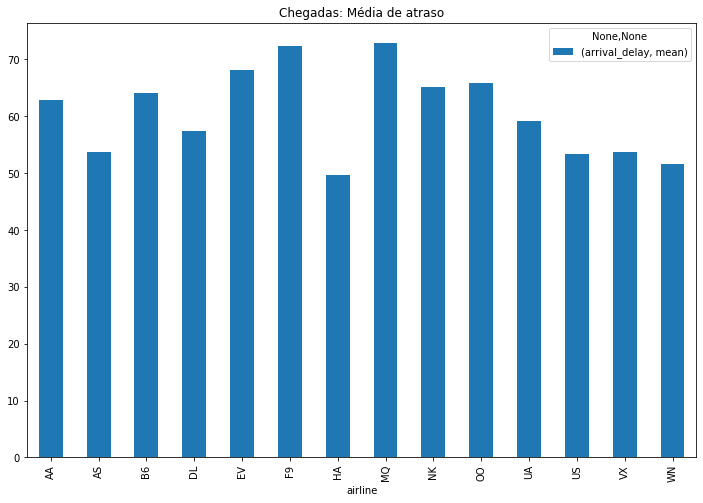

In [780]:
# you should get
# 
# NK   31.661
# F9   31.106
# MQ   25.388
# UA   23.082
# B6   22.461
# EV   21.207
# AA   20.621
# WN   19.720
# VX   18.968
# OO   18.935
# US   18.393
# DL   14.817
# AS   12.525
# HA   11.453


#ff = flights[flights.is_delayed == True]
#xx = ff[['airline','arrival_delay']].groupby('airline').agg(['mean'])
xx = flights[['airline','arrival_delay']][flights.is_delayed == True].groupby('airline').agg(['mean'])
print(xx)

#res = xx.sort_values(['airline','arrival_delay'],ascending=False).groupby('airline')
#print(res)

import matplotlib.pyplot as plt
xx.plot.bar()
plt.title("Chegadas: Média de atraso")



Como podem observar os atrasos variam imenso de companhia aérea para companhia aérea. 
<br><br>
Notem da importância de se efetuar esta análise usando percentagens e não o valor absoluto. Por exemplo, se a companhia aérea X tive 10 voos em atraso e a companhia aérea Y 100, o que isso nos diz? Na verdade muito pouco.. Pois a companhia aérea X pode ter um total de 30 voos e a Y um total de 2000, o que torna a situação bem diferente, não é verdade?

<div class="alert alert-success">
Q.12<br>
    Calcule o número de voos por dia da semana. Se quiser, apresente o resultado num gráfico.
</div>

Text(0.5, 1.0, 'Number of flights per day of week')

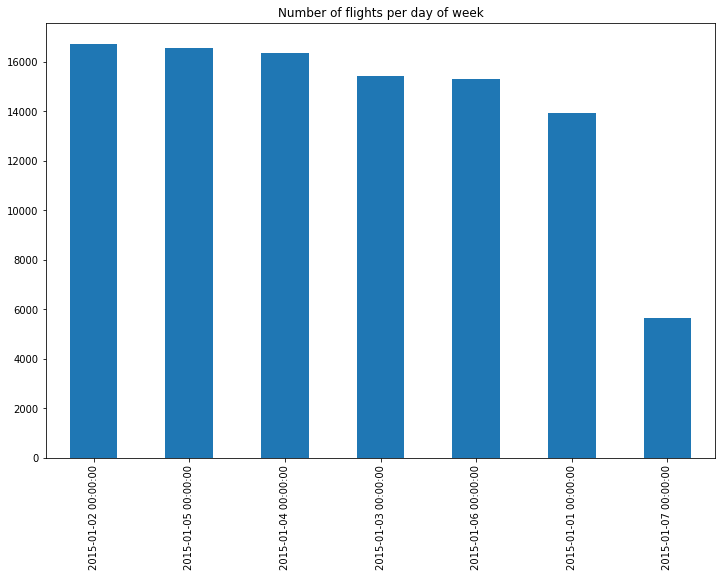

In [785]:
# number of flights per day of week

flights['date'].value_counts()


import matplotlib.pyplot as plt
flights['date'].value_counts().plot.bar()
plt.title("Number of flights per day of week")


A próxima pergunta é livre, ou seja, o objectivo é com base no que aprenderam até agora explorarem os dados de forma a extrair o máximo de insights úteis para o objetivo final do desafio do Kaggle: prever os voos que se irão atrasar.

<span class="badge">Nota:</span> Senão responderem não serão prejudicados, contudo, quanto mais fizerem mais pontos adicionais terão.

Considerem algumas das seguintes sugestões:
<div class="alert alert-warning">
Q.13<br>
  <ul>
    <li> Quais os aeroportos que têm mais voos? E menos? </li>
    <li> Quais os dias da semana com mais voos? </li>
    <li> Qual a média de atrasos global (arrival_delay)? </li>
    <li> Qual é a principal razão de atraso (air_system_delay, security_delay, airline_delay, late_aircraft_delay, weather_delay)?</li>
  </ul>
</div>

In [791]:
# Q13 -1
#Quais os aeroportos que têm mais voos? E menos? 
# code here

#flights.head(10)

#Quais os aeroportos que têm mais voos
a = flights['origin_airport'].value_counts().head(5)
print(a)
print()

#Quais os aeroportos que têm menos voos
b = flights['origin_airport'].value_counts().tail(5)
print(b)

ATL    6009
DFW    4920
ORD    4878
DEN    3896
LAX    3764
Name: origin_airport, dtype: int64

ILG    5
GFK    4
OTH    3
ADK    2
PPG    2
Name: origin_airport, dtype: int64


In [792]:
# Q13 -2
#Quais os dias da semana com mais voos? 
# code here

#flights.head(10)
flights['day_of_week'].value_counts()


Sex    16741
Seg    16548
Dom    16352
Sab    15434
Ter    15315
Qui    13950
Qua     5659
Name: day_of_week, dtype: int64

In [793]:
# Q13 -3
#Qual a média de atrasos global (arrival_delay)? 
# code here

#sol 1 : voos em atraso sobre totalidade dos voos
voos_atraso = flights['is_delayed'].sum() #soma os Trues
percentagem_atraso = (voos_atraso / len(flights)) * 100
#print (voos_atraso)
print(percentagem_atraso)

#sol. 2
a = sum(flights['is_delayed']) * 100 / len(flights)
print(a)

#sol. 3
b = sum(flights['arrival_delay'] >=15) * 100 / len(flights)
print(b)

#sol 4
import numpy as np
np.mean(flights['arrival_delay'] >=15) * 100


34.62534625346254
34.62534625346253
34.62534625346253


34.62534625346254

In [749]:
# Q13 -4
#Qual é a principal razão de atraso (air_system_delay, security_delay, airline_delay, late_aircraft_delay, weather_delay)?
# code here

#maior parte dos dados está a nulo
flights[['cancellation_reason', 'air_system_delay', 'security_delay', 'airline_delay', 'late_aircraft_delay', 'weather_delay']]

#percentagem dos nulos - comprova-se que são estas variáveis
#((flights.isnull().sum() / flights.count())).sort_values(ascending=False).map('{:.2f}%'.format).head(7)

#estatísticas destas variaveis
flights[['air_system_delay', 'security_delay', 'airline_delay', 'late_aircraft_delay', 'weather_delay']].describe()

#um valor médio maior é o late_aircraft_delay, logo será a principal razão de atraso
#nota, estou a trabalhar com ficheiro minimo, no real estes valores podem ser diferentes

,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
count,"34,625.000","34,625.000","34,625.000","34,625.000","34,625.000"
mean,14.027,0.071,17.854,26.015,2.752
std,25.965,1.693,43.528,42.593,17.266
min,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000
50%,4.000,0.000,4.000,10.000,0.000
75%,19.000,0.000,19.000,35.000,0.000
max,590.000,107.000,"1,380.000",891.000,562.000
